In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris

2025-02-21 07:06:30.990649: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 07:06:31.001054: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 07:06:31.124820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 07:06:31.274318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740100891.466010     601 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740100891.52

In [2]:
import numpy as np
import pandas  as pd
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)','petal width (cm)']]
y = (iris.target==0)

In [4]:
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [6]:
X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new)
y_pred

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([ True, False])

In [7]:
per_clf.score(X_new, y_pred)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


1.0

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], max_iter=1000, alpha=1e-4, solver='sgd', verbose=True, tol=1e-4, random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

Iteration 1, loss = 1.01333150
Iteration 2, loss = 0.32089749
Iteration 3, loss = 0.27545348
Iteration 4, loss = 0.25817764
Iteration 5, loss = 0.24519405
Iteration 6, loss = 0.23504776
Iteration 7, loss = 0.22724986
Iteration 8, loss = 0.22062669
Iteration 9, loss = 0.21554292
Iteration 10, loss = 0.21128779
Iteration 11, loss = 0.20765686
Iteration 12, loss = 0.20477852
Iteration 13, loss = 0.20196671
Iteration 14, loss = 0.19970884
Iteration 15, loss = 0.19731632
Iteration 16, loss = 0.19543799
Iteration 17, loss = 0.19370094
Iteration 18, loss = 0.19221116
Iteration 19, loss = 0.19061086
Iteration 20, loss = 0.18932973
Iteration 21, loss = 0.18817761
Iteration 22, loss = 0.18716246
Iteration 23, loss = 0.18581255
Iteration 24, loss = 0.18475760
Iteration 25, loss = 0.18384392
Iteration 26, loss = 0.18288821
Iteration 27, loss = 0.18189601
Iteration 28, loss = 0.18102827
Iteration 29, loss = 0.18022771
Iteration 30, loss = 0.17922939
Iteration 31, loss = 0.17841437
Iteration 32, los

In [10]:
rmse

0.5599199061711829

## Building an imagee classififer using the Sequential API

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [12]:
X_train.shape

(55000, 28, 28)

In [13]:
y_test.shape

(10000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train, X_valid ,X_test = X_train /255. ,X_valid /255. ,X_test /255.

In [17]:
class_names = ['T -Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [18]:
class_names[y_train[0]]

'Ankle boot'

In [19]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-21 07:06:49.487894: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [22]:
hidden1= model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer('dense') is hidden1

True

In [24]:
weights , biases = hidden1.get_weights()
weights , biases

(array([[ 0.01661695, -0.01975131, -0.01539797, ...,  0.02579428,
          0.03426689,  0.03549784],
        [-0.05830675,  0.07143584,  0.02265548, ...,  0.04450978,
          0.01180676, -0.0147328 ],
        [-0.04388625, -0.06809369,  0.00811706, ..., -0.03167731,
         -0.05772988,  0.02275071],
        ...,
        [ 0.00252933, -0.02421336, -0.04667814, ..., -0.07024946,
         -0.04824611,  0.03267114],
        [-0.03387398,  0.06258774,  0.06404047, ...,  0.02589303,
          0.02610755,  0.04750314],
        [ 0.02940335,  0.06061809, -0.01399969, ..., -0.04073108,
         -0.03376512, -0.00679415]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer ='sgd',
              metrics = ['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6780 - loss: 1.0239 - val_accuracy: 0.8306 - val_loss: 0.5055
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8273 - loss: 0.5051 - val_accuracy: 0.8392 - val_loss: 0.4545
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8433 - loss: 0.4506 - val_accuracy: 0.8472 - val_loss: 0.4308
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8543 - loss: 0.4206 - val_accuracy: 0.8524 - val_loss: 0.4152
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8610 - loss: 0.3989 - val_accuracy: 0.8528 - val_loss: 0.4056
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8662 - loss: 0.3824 - val_accuracy: 0.8550 - val_loss: 0.3967
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8707 - loss: 0.3685 - val_accuracy: 0.8570 - val_loss: 0.3876
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8745 - loss: 0.3564 - 

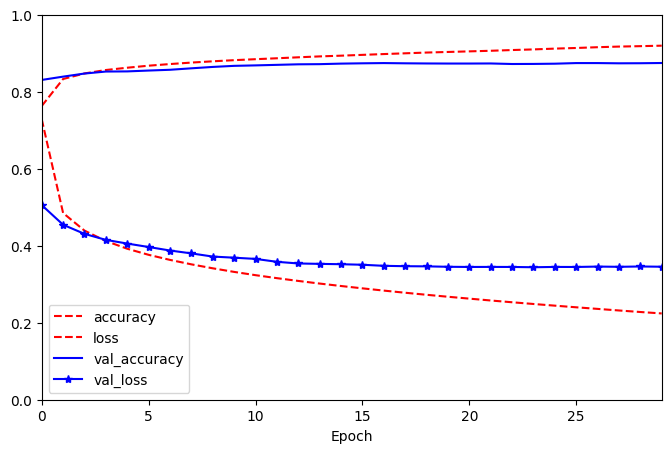

In [29]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],xlabel="Epoch",
                                   style=['r--','r--','b-','b-*'])
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.3637


[0.36206385493278503, 0.8729000091552734]

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.01, 0.  , 0.81],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
import numpy as np

y_pred = y_proba.argmax(axis=1)
y_pred


array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U12')

## Building a Regression MLP Using the Sequential API

In [34]:
from sklearn.datasets import fetch_california_housing


In [35]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [36]:
tf.random.set_seed(42)
norm_layer= tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer,metrics=['RootMeanSquaredError'])

norm_layer.adapt(X_train)

history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))


Epoch 1/20


/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.2123 - loss: 1.5997 - val_RootMeanSquaredError: 0.6812 - val_loss: 0.4641
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6412 - loss: 0.4116 - val_RootMeanSquaredError: 0.9533 - val_loss: 0.9088
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6138 - loss: 0.3771 - val_RootMeanSquaredError: 1.0555 - val_loss: 1.1140
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6007 - loss: 0.3610 - val_RootMeanSquaredError: 0.7485 - val_loss: 0.5602
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5876 - loss: 0.3455 - val_RootMeanSquaredError: 0.7218 - val_loss: 0.5211
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5803 - loss: 0.3369 - val_RootMeanSquaredError: 0.9988 - val_loss: 0.9975
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5723 - loss: 0.3276 -

In [37]:
se_test,rmse_test = model.evaluate(X_test,y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - RootMeanSquaredError: 0.5410 - loss: 0.2928
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [38]:
y_pred

array([[0.58403915],
       [0.98255926],
       [5.2052083 ]], dtype=float32)

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

## Building  Complex Models Using the Functional API

In [40]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30,activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30,activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ =    tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)


model = tf.keras.models.Model(inputs=input_, outputs=output)

In [41]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 8)         │         17 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        270 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30)        │        930 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.6526 - loss: 2.9136 - val_RootMeanSquaredError: 0.9858 - val_loss: 0.9717
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6987 - loss: 0.4895 - val_RootMeanSquaredError: 1.0951 - val_loss: 1.1992
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6479 - loss: 0.4201 - val_RootMeanSquaredError: 1.1920 - val_loss: 1.4209
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6288 - loss: 0.3957 - val_RootMeanSquaredError: 0.9992 - val_loss: 0.9985
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6145 - loss: 0.3778 - val_RootMeanSquaredError: 0.7923 - val_loss: 0.6278
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6061 - loss: 0.3676 - val_RootMeanSquaredError: 0.8104 - val_loss: 0.6568
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5979 - los

In [43]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 6
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs = [input_wide,input_deep], outputs = [output])

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.8266 - loss: 3.4442 - val_RootMeanSquaredError: 0.9847 - val_loss: 0.9695
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8188 - loss: 0.6712 - val_RootMeanSquaredError: 0.8973 - val_loss: 0.8051
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7377 - loss: 0.5445 - val_RootMeanSquaredError: 1.1799 - val_loss: 1.3923
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6912 - loss: 0.4780 - val_RootMeanSquaredError: 1.3583 - val_loss: 1.8450
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6613 - loss: 0.4375 - val_RootMeanSquaredError: 1.6069 - val_loss: 2.5822
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6427 - loss: 0.4132 - val_RootMeanSquaredError: 1.5929 - val_loss: 2.5372
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6255 - los

In [45]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [46]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [48]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_2_RootMeanSquaredError: 1.7518 - dense_2_loss: 3.2100 - dense_3_RootMeanSquaredError: 1.8285 - dense_3_loss: 3.4509 - loss: 3.2341 - val_dense_2_RootMeanSquaredError: 1.2096 - val_dense_2_loss: 1.4626 - val_dense_3_RootMeanSquaredError: 1.3362 - val_dense_3_loss: 1.7848 - val_loss: 1.4953
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.8408 - dense_2_loss: 0.7077 - dense_3_RootMeanSquaredError: 0.8802 - dense_3_loss: 0.7755 - loss: 0.7145 - val_dense_2_RootMeanSquaredError: 0.7273 - val_dense_2_loss: 0.5288 - val_dense_3_RootMeanSquaredError: 1.0767 - val_dense_3_loss: 1.1588 - val_loss: 0.5920
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.7423 - dense_2_loss: 0.5514 - dense_3_RootMeanSquaredError: 0.7738 - dense_3_loss: 0.5989 - loss: 0.5561 - val_dense_2_RootMeanSquaredError: 0.7315 - val_dense_2_loss: 0.5350 - val_dense_3_RootMeanSquaredError: 0.7

In [49]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss = eval_results[:3]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_2_RootMeanSquaredError: 0.5737 - dense_2_loss: 0.3293 - dense_3_RootMeanSquaredError: 0.6294 - dense_3_loss: 0.3962 - loss: 0.3360


In [50]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [51]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


### Using the Subclassing API To Build Dynamic Models

In [52]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.7275 - RootMeanSquaredError_1: 1.6001 - loss: 3.0460 - mse_loss: 2.6171 - val_RootMeanSquaredError: 0.8702 - val_RootMeanSquaredError_1: 1.5112 - val_loss: 0.9098 - val_mse_loss: 2.2827
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8127 - RootMeanSquaredError_1: 0.8385 - loss: 0.6658 - mse_loss: 0.7041 - val_RootMeanSquaredError: 0.8403 - val_RootMeanSquaredError_1: 1.0210 - val_loss: 0.7398 - val_mse_loss: 1.0422
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7249 - RootMeanSquaredError_1: 0.7527 - loss: 0.5299 - mse_loss: 0.5667 - val_RootMeanSquaredError: 0.8656 - val_RootMeanSquaredError_1: 0.7140 - val_loss: 0.7253 - val_mse_loss: 0.5097
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6806 - RootMeanSquaredError_1: 0.7288 - loss: 0.4703 - mse_loss: 0.5312 - val_RootMeanSquaredError: 0.8617 - val_RootMeanSquaredEr

### Saving and Restoring a Model

In [57]:
model.save('my_keras_model.keras')

In [59]:
model = tf.keras.models.load_model('my_keras_model')
y_pred_main , y_pred_aux = model.predict((X_new_wide, X_new_deep))

ValueError: File format not supported: filepath=my_keras_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(my_keras_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

## Using Callbacks

In [71]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoint.weights.h5",save_weights_only=True,save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history = model.fit(
(X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
callbacks = [checkpoint_cb,early_stopping_cb ]
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5156 - RootMeanSquaredError_1: 0.5457 - loss: 0.2691 - mse_loss: 0.2979 - val_RootMeanSquaredError: 0.5838 - val_RootMeanSquaredError_1: 0.7763 - val_loss: 0.3670 - val_mse_loss: 0.6025
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5148 - RootMeanSquaredError_1: 0.5444 - loss: 0.2682 - mse_loss: 0.2965 - val_RootMeanSquaredError: 0.5250 - val_RootMeanSquaredError_1: 0.5618 - val_loss: 0.2796 - val_mse_loss: 0.3156
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5147 - RootMeanSquaredError_1: 0.5447 - loss: 0.2681 - mse_loss: 0.2968 - val_RootMeanSquaredError: 0.5262 - val_RootMeanSquaredError_1: 0.5951 - val_loss: 0.2846 - val_mse_loss: 0.3541
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5147 - RootMeanSquaredError_1: 0.5447 - loss: 0.2681 - mse_loss: 0.2968 - val_RootMeanSquaredError: 0.5324 - val_RootMeanSquaredEr

In [72]:
%pip install -q -U tensorboard-plugin-profile


Note: you may need to restart the kernel to use updated packages.


## Using TensorBoard for Visualization

In [74]:
from pathlib import Path
from time import strftime
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")
run_logdir = get_run_logdir()  # e.g., my_logs/run_2022_08_01_17_25_59

In [76]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))

history = model.fit(
(X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
callbacks = [tensorboard_cb])

Epoch 1/20


2025-02-20 08:52:53.083432: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-02-20 08:52:53.083492: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-02-20 08:52:53.085935: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


187/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5146 - RootMeanSquaredError_1: 0.5398 - loss: 0.2676 - mse_loss: 0.2915

2025-02-20 08:52:53.507013: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-02-20 08:52:53.507052: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.


241/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5147 - RootMeanSquaredError_1: 0.5420 - loss: 0.2679 - mse_loss: 0.2939

2025-02-20 08:52:53.714983: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-02-20 08:52:53.748391: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-02-20 08:52:53.751573: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2025_02_20_08_51_40/train/plugins/profile/2025_02_20_08_52_53/archlinux.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5145 - RootMeanSquaredError_1: 0.5445 - loss: 0.2680 - mse_loss: 0.2966 - val_RootMeanSquaredError: 0.5199 - val_RootMeanSquaredError_1: 0.5981 - val_loss: 0.2790 - val_mse_loss: 0.3577
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5146 - RootMeanSquaredError_1: 0.5443 - loss: 0.2680 - mse_loss: 0.2963 - val_RootMeanSquaredError: 0.5230 - val_RootMeanSquaredError_1: 0.5635 - val_loss: 0.2780 - val_mse_loss: 0.3175
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5142 - RootMeanSquaredError_1: 0.5443 - loss: 0.2677 - mse_loss: 0.2964 - val_RootMeanSquaredError: 0.5216 - val_RootMeanSquaredError_1: 0.5862 - val_loss: 0.2792 - val_mse_loss: 0.3436
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5140 - RootMeanSquaredError_1: 0.5438 - loss: 0.2674 - mse_loss: 0.2959 - val_RootMeanSquaredError: 0.5471 - val_RootMeanSquaredError_1: 0.57

In [79]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


2025-02-20 09:25:30.025819: E tensorflow/core/util/util.cc:131] oneDNN supports DT_STRING only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


In [78]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13623), started 0:25:47 ago. (Use '!kill 13623' to kill it.)

In [80]:
!tensorboard dev upload --logdir=./my_logs

2025-02-20 09:26:57.030634: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 09:26:57.034148: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 09:26:57.085212: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 09:26:57.140850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740022917.194304   16467 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740022917.20